# Advanced Transformation and Standardizations

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
v1 = np.array([1, 3, 6, 5, 7])
v2 = np.array([7, 7, 5, 8, 12])
v3 = np.array([6, 12, 5, 6, 14])
df = pd.DataFrame({
    "v1": v1,
    "v2": v2,
    "v3": v3,
})

df = df.astype(float)
df

,v1,v2,v3
0,1.0,7.0,6.0
1,3.0,7.0,12.0
2,6.0,5.0,5.0
3,5.0,8.0,6.0
4,7.0,12.0,14.0


In [2]:
var_names = df.columns

## Standardization

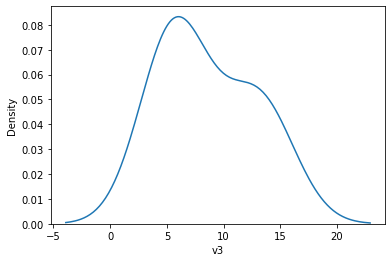

In [3]:
sns.kdeplot(df["v3"]);

In [4]:
from sklearn import preprocessing

In [5]:
std_df = preprocessing.scale(df)
std_df

array([[-1.57841037, -0.34554737, -0.70920814],
       [-0.64993368, -0.34554737,  0.92742603],
       [ 0.74278135, -1.2094158 , -0.98198051],
       [ 0.27854301,  0.08638684, -0.70920814],
       [ 1.2070197 ,  1.81412369,  1.47297076]])

In [6]:
std_df = pd.DataFrame(std_df, columns=var_names)

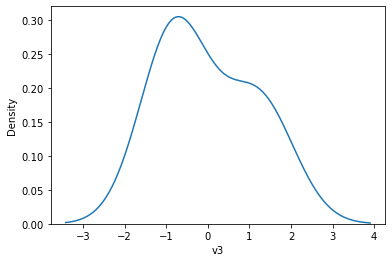

In [7]:
sns.kdeplot(std_df["v3"]);

## Normalization

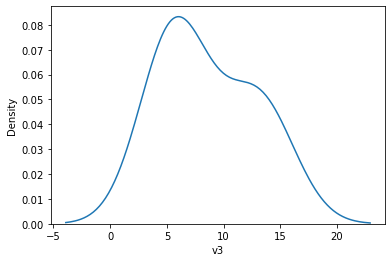

In [8]:
sns.kdeplot(df["v3"]);

In [9]:
nm_df = preprocessing.normalize(df)
nm_df = pd.DataFrame(nm_df, columns=var_names)

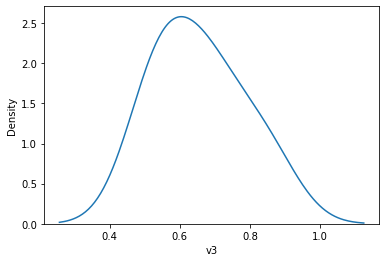

In [10]:
sns.kdeplot(nm_df["v3"]);

## Min-Max Transformation

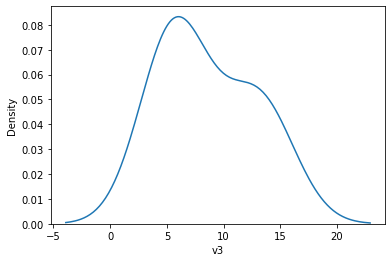

In [11]:
sns.kdeplot(df["v3"]);

In [12]:
scaler = preprocessing.MinMaxScaler(feature_range=(0, 100))

In [13]:
sc_df = scaler.fit_transform(df)
sc_df

array([[  0.        ,  28.57142857,  11.11111111],
       [ 33.33333333,  28.57142857,  77.77777778],
       [ 83.33333333,   0.        ,   0.        ],
       [ 66.66666667,  42.85714286,  11.11111111],
       [100.        , 100.        , 100.        ]])

In [14]:
sc_df = pd.DataFrame(sc_df, columns=var_names)

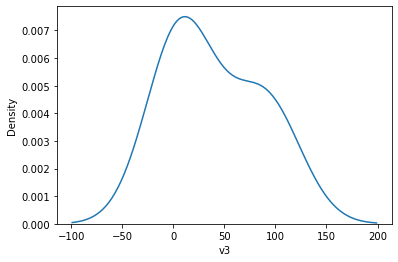

In [15]:
sns.kdeplot(sc_df["v3"]);

## Binarization

In [16]:
binarizer = preprocessing.Binarizer(threshold=5).fit(df)

In [17]:
binarizer.transform(df)

array([[0., 1., 1.],
       [0., 1., 1.],
       [1., 0., 0.],
       [0., 1., 1.],
       [1., 1., 1.]])

## 0-1 Transformation

#### 1. Way

In [18]:
tips = sns.load_dataset("tips")
df_tips = tips.copy()
df_tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [19]:
df_tips["sex_bnrzd"] = df_tips["sex"].cat.codes

In [20]:
df_tips.head()

,total_bill,tip,sex,smoker,day,time,size,sex_bnrzd
0,16.99,1.01,Female,No,Sun,Dinner,2,1
1,10.34,1.66,Male,No,Sun,Dinner,3,0
2,21.01,3.50,Male,No,Sun,Dinner,3,0
3,23.68,3.31,Male,No,Sun,Dinner,2,0
4,24.59,3.61,Female,No,Sun,Dinner,4,1


#### 2.Way

In [21]:
lbe = preprocessing.LabelEncoder()
df_tips["sex_bnrzd"] = lbe.fit_transform(df_tips["sex"])
df_tips.head()

,total_bill,tip,sex,smoker,day,time,size,sex_bnrzd
0,16.99,1.01,Female,No,Sun,Dinner,2,0
1,10.34,1.66,Male,No,Sun,Dinner,3,1
2,21.01,3.50,Male,No,Sun,Dinner,3,1
3,23.68,3.31,Male,No,Sun,Dinner,2,1
4,24.59,3.61,Female,No,Sun,Dinner,4,0


## "1 and Others" Transformation

In [22]:
df_tips.head()

,total_bill,tip,sex,smoker,day,time,size,sex_bnrzd
0,16.99,1.01,Female,No,Sun,Dinner,2,0
1,10.34,1.66,Male,No,Sun,Dinner,3,1
2,21.01,3.50,Male,No,Sun,Dinner,3,1
3,23.68,3.31,Male,No,Sun,Dinner,2,1
4,24.59,3.61,Female,No,Sun,Dinner,4,0


In [23]:
df_tips["day_trns"] = np.where(df_tips["day"].str.contains("Sun"), 1, 0)
df_tips.head()

,total_bill,tip,sex,smoker,day,time,size,sex_bnrzd,day_trns
0,16.99,1.01,Female,No,Sun,Dinner,2,0,1
1,10.34,1.66,Male,No,Sun,Dinner,3,1,1
2,21.01,3.50,Male,No,Sun,Dinner,3,1,1
3,23.68,3.31,Male,No,Sun,Dinner,2,1,1
4,24.59,3.61,Female,No,Sun,Dinner,4,0,1


## Multiple Classes Transformation

In [25]:
lbe = preprocessing.LabelEncoder()
df_tips["day_trns2"] = lbe.fit_transform(df_tips["day"])
df_tips.head()

,total_bill,tip,sex,smoker,day,time,size,sex_bnrzd,day_trns,day_trns2
0,16.99,1.01,Female,No,Sun,Dinner,2,0,1,2
1,10.34,1.66,Male,No,Sun,Dinner,3,1,1,2
2,21.01,3.50,Male,No,Sun,Dinner,3,1,1,2
3,23.68,3.31,Male,No,Sun,Dinner,2,1,1,2
4,24.59,3.61,Female,No,Sun,Dinner,4,0,1,2


In [27]:
df_tips.day.unique()

['Sun', 'Sat', 'Thur', 'Fri']
Categories (4, object): ['Thur', 'Fri', 'Sat', 'Sun']

In [28]:
df_tips.day_trns2.unique()

array([2, 1, 3, 0])

## One-Hot Encoding and Dummy Variable Trap

In [29]:
df_one_hot = df_tips.copy()

In [30]:
pd.get_dummies(df_one_hot, columns=["sex"], prefix=["sex"]).head()

,total_bill,tip,smoker,day,time,size,sex_bnrzd,day_trns,day_trns2,sex_Male,sex_Female
0,16.99,1.01,No,Sun,Dinner,2,0,1,2,0,1
1,10.34,1.66,No,Sun,Dinner,3,1,1,2,1,0
2,21.01,3.50,No,Sun,Dinner,3,1,1,2,1,0
3,23.68,3.31,No,Sun,Dinner,2,1,1,2,1,0
4,24.59,3.61,No,Sun,Dinner,4,0,1,2,0,1


In [31]:
pd.get_dummies(df_one_hot, columns=["day"], prefix=["day"]).head()

,total_bill,tip,sex,smoker,time,size,sex_bnrzd,day_trns,day_trns2,day_Thur,day_Fri,day_Sat,day_Sun
0,16.99,1.01,Female,No,Dinner,2,0,1,2,0,0,0,1
1,10.34,1.66,Male,No,Dinner,3,1,1,2,0,0,0,1
2,21.01,3.50,Male,No,Dinner,3,1,1,2,0,0,0,1
3,23.68,3.31,Male,No,Dinner,2,1,1,2,0,0,0,1
4,24.59,3.61,Female,No,Dinner,4,0,1,2,0,0,0,1


## Transform Continuous Variables into Categorical Variables

In [33]:
df_tips.head()

,total_bill,tip,sex,smoker,day,time,size,sex_bnrzd,day_trns,day_trns2
0,16.99,1.01,Female,No,Sun,Dinner,2,0,1,2
1,10.34,1.66,Male,No,Sun,Dinner,3,1,1,2
2,21.01,3.50,Male,No,Sun,Dinner,3,1,1,2
3,23.68,3.31,Male,No,Sun,Dinner,2,1,1,2
4,24.59,3.61,Female,No,Sun,Dinner,4,0,1,2


In [41]:
dff = df_tips.select_dtypes(include = ["float64", "int64"])

In [42]:
est = preprocessing.KBinsDiscretizer(n_bins=[3, 2, 2], encode="ordinal", strategy="quantile").fit(dff)

In [46]:
est.transform(dff)[:10]

array([[1., 0., 1.],
       [0., 0., 1.],
       [2., 1., 1.],
       [2., 1., 1.],
       [2., 1., 1.],
       [2., 1., 1.],
       [0., 0., 1.],
       [2., 1., 1.],
       [1., 0., 1.],
       [0., 1., 1.]])

## Interchange Index and Variable

In [ ]:
df[]